In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
import os

In [2]:
import tensorflow as tf
tf.enable_eager_execution()

In [3]:
sys.path.insert(0, "/Users/noah/Documents/CHU/super_resolution/super_resolution/")

In [4]:
from training_data import record_utils
from training_data import convert_to_envelope
from preprocessing import preprocess
from trainer import loss_utils

In [5]:
envelope_file = "/Users/noah/Documents/CHU/super_resolution/test_data/3_18_envelope/simulation_circle_3_18_envelope_train_simulation_0000102.tfrecord"
examples_envelope = convert_to_envelope.tfrecord_to_example(envelope_file)


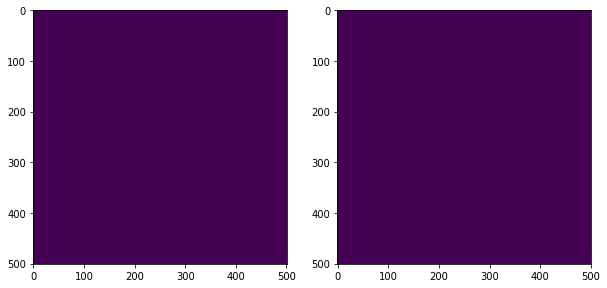

In [31]:
i = 7
envelope_distribution = examples_envelope[i][0]
envelope_observation = examples_envelope[i][1]
scatterer_count = np.sum(envelope_distribution)
fig, ax = plt.subplots(1, 2, figsize=(10,30))
ax[0].imshow(envelope_distribution)
ax[1].imshow(envelope_observation[8, ..., 0])

In [23]:
max_vals = []
average_vals = []
distribution_pool_downsample = 30

for i in range(10):
    envelope_distribution_base = tf.convert_to_tensor(examples_envelope[i][0])
    envelope_observation_base = tf.convert_to_tensor(examples_envelope[i][1])
    envelope_distribution, envelope_observation=preprocess.select_frequency(0)(envelope_distribution_base, envelope_observation_base)
    envelope_distribution = envelope_distribution[tf.newaxis, ..., tf.newaxis]
    envelope_distribution = tf.keras.layers.AveragePooling2D(distribution_pool_downsample).apply(envelope_distribution) * (
      distribution_pool_downsample ** 2)
    envelope_distribution = envelope_distribution[..., 0]
    print("max val", np.amax(envelope_distribution))
    max_vals.append(np.amax(envelope_distribution))
    print("sum", np.sum(envelope_distribution))
    average_vals.append(np.mean(envelope_distribution))

max val 15.000001
sum 1277.0
max val 18.0
sum 773.0
max val 17.0
sum 1021.0
max val 19.0
sum 993.0
max val 4.0
sum 111.0
max val 17.0
sum 1025.0
max val 13.0
sum 455.0
max val 0.0
sum 0.0
max val 11.0
sum 175.0
max val 12.0
sum 206.0


(array([1., 0., 1., 0., 0., 1., 2., 1., 2., 2.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ],
       dtype=float32),
 <a list of 10 Patch objects>)

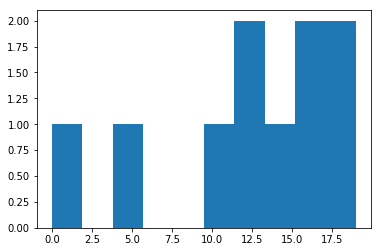

In [27]:
plt.hist(max_vals)

In [25]:
2 ** 4

16

In [11]:
bit_depth=3
distributions_quantized = loss_utils.quantize_tensor(
    envelope_distribution, bit_depth, 0., 2**bit_depth)
print(distributions_quantized.shape)
def _logit_to_class(logit):
  return tf.argmax(logit, -1)
distribution_class = _logit_to_class(distributions_quantized)

(1, 50, 50, 8)


Real scatterer count 1093.0
quantized scatterer count 1087


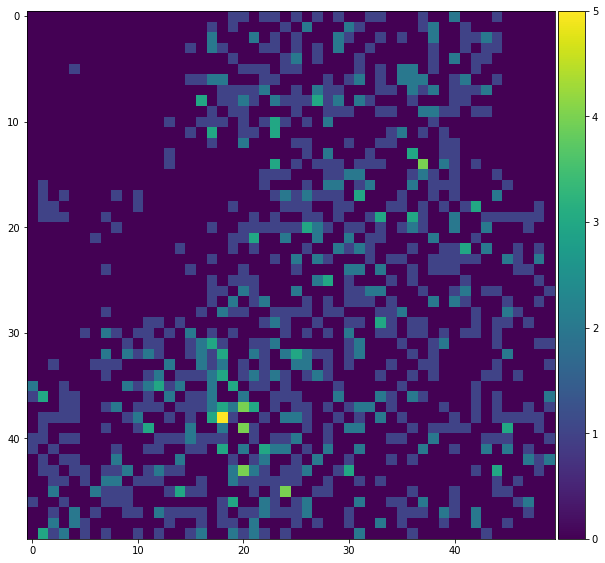

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10,30))
im = ax.imshow(distribution_class[0, ...])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
print("Real scatterer count {}".format(scatterer_count))
print("quantized scatterer count {}".format(np.sum(distribution_class)))

In [ ]:
tf.contrib.training.HParams(
    distribution_pool_downsample='',
    
  )

In [ ]:
params=[

]

observations, distributions=gpu_preprocess(single_frequency_observations[np.newaxis, ...], envelope_distribution[np.newaxis, ...])